In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score, KFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import uniform
import imblearn

In [ ]:
path = "/content/drive/MyDrive/datasets/diabetes with 2000 samples.csv"
data = pd.read_csv(path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
np.set_printoptions(threshold = sys.maxsize)

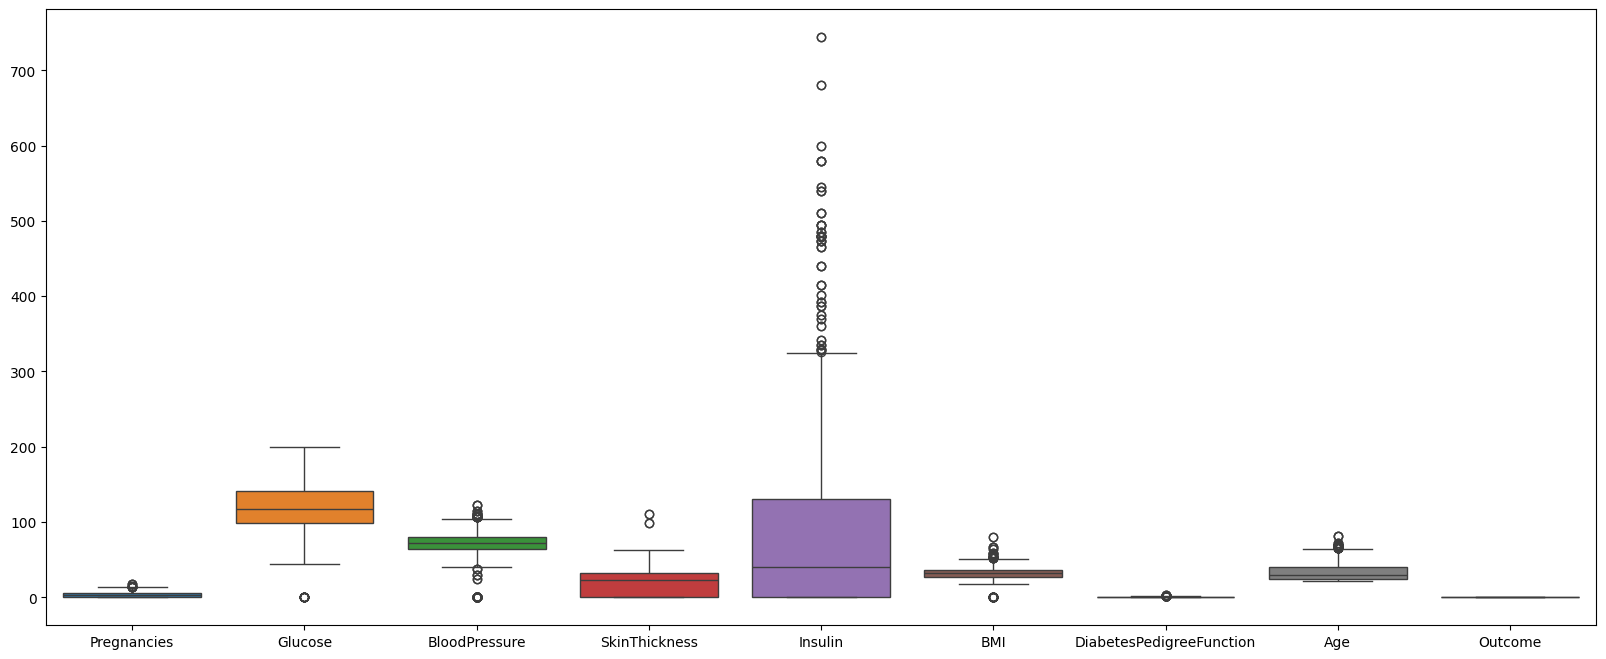

In [ ]:
plt.figure(figsize=(20, 8))
sb.boxplot(data= data)
plt.show()

In [ ]:
Q1 = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].quantile(0.25)
Q3 = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].quantile(0.75)
IQR = Q3 - Q1

outliers = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

data_without_outliers = data[~((data[outliers] < (Q1 - 1.5 * IQR)) | (data[outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]

data_without_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
3,0,135,68,42,250,42.3,0.365,24,1
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
...,...,...,...,...,...,...,...,...,...
1994,1,79,60,42,48,43.5,0.678,23,0
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0


In [ ]:
data_without_outliers = data_without_outliers.reset_index()
data_without_outliers.drop(['index'],axis = 1,inplace = True)
data_without_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,135,68,42,250,42.3,0.365,24,1
3,0,173,78,32,265,46.5,1.159,58,0
4,4,99,72,17,0,25.6,0.294,28,0
...,...,...,...,...,...,...,...,...,...
1647,1,79,60,42,48,43.5,0.678,23,0
1648,2,75,64,24,55,29.7,0.370,33,0
1649,8,179,72,42,130,32.7,0.719,36,1
1650,6,85,78,0,0,31.2,0.382,42,0


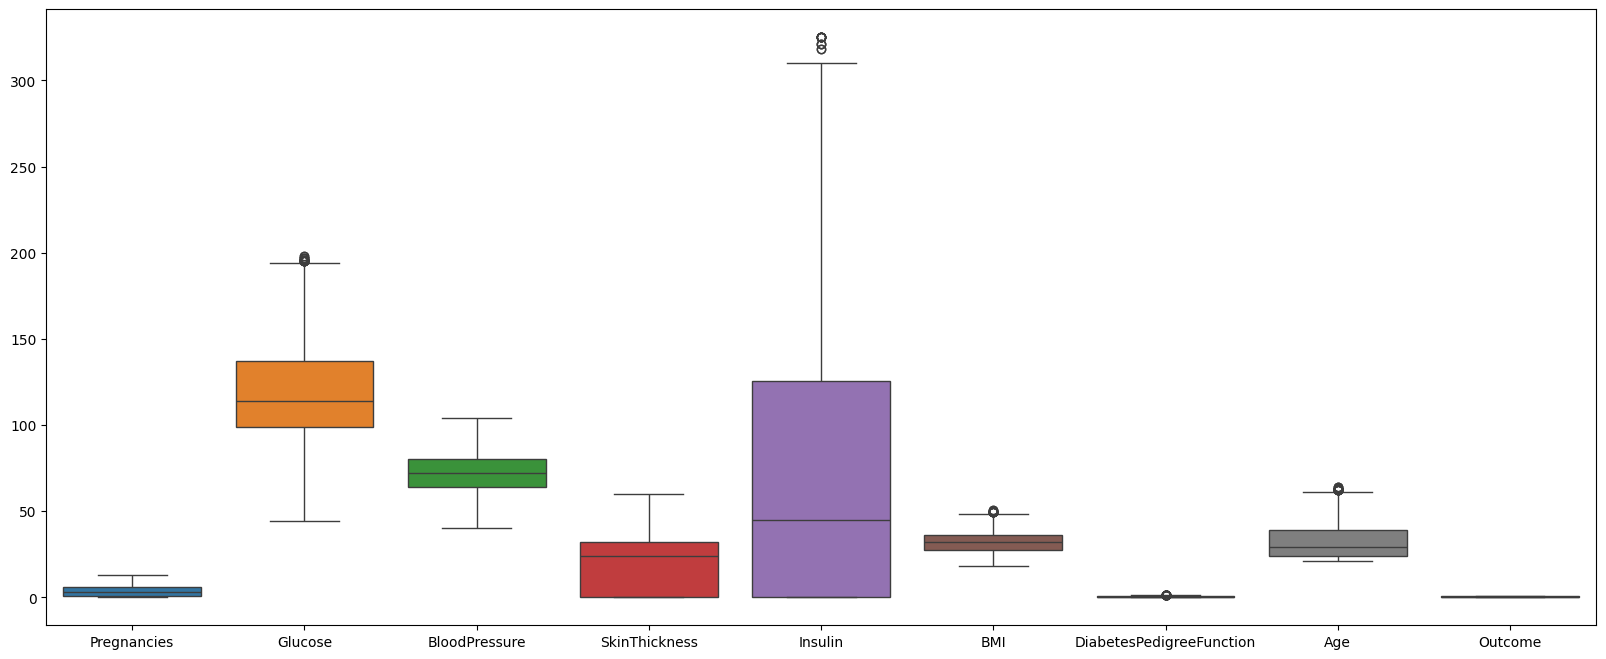

In [ ]:
plt.figure(figsize=(20, 8))
sb.boxplot(data= data_without_outliers)
plt.show()

In [ ]:
X = data_without_outliers.iloc[:,:-1]
y = data_without_outliers.iloc[:,-1]

In [ ]:
columns_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
X[columns_to_replace] = X[columns_to_replace].replace(0,np.nan)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35.0,NaN,33.6,0.127,47
1,0,84,82,31.0,125.0,38.2,0.233,23
2,0,135,68,42.0,250.0,42.3,0.365,24
3,0,173,78,32.0,265.0,46.5,1.159,58
4,4,99,72,17.0,NaN,25.6,0.294,28
...,...,...,...,...,...,...,...,...
1647,1,79,60,42.0,48.0,43.5,0.678,23
1648,2,75,64,24.0,55.0,29.7,0.370,33
1649,8,179,72,42.0,130.0,32.7,0.719,36
1650,6,85,78,NaN,NaN,31.2,0.382,42


In [ ]:
imputer = KNNImputer(n_neighbors=3)
X = imputer.fit_transform(X)
X

array([[2.00000000e+00, 1.38000000e+02, 6.20000000e+01, 3.50000000e+01,
        1.40000000e+02, 3.36000000e+01, 1.27000000e-01, 4.70000000e+01],
       [0.00000000e+00, 8.40000000e+01, 8.20000000e+01, 3.10000000e+01,
        1.25000000e+02, 3.82000000e+01, 2.33000000e-01, 2.30000000e+01],
       [0.00000000e+00, 1.35000000e+02, 6.80000000e+01, 4.20000000e+01,
        2.50000000e+02, 4.23000000e+01, 3.65000000e-01, 2.40000000e+01],
       [0.00000000e+00, 1.73000000e+02, 7.80000000e+01, 3.20000000e+01,
        2.65000000e+02, 4.65000000e+01, 1.15900000e+00, 5.80000000e+01],
       [4.00000000e+00, 9.90000000e+01, 7.20000000e+01, 1.70000000e+01,
        7.00000000e+01, 2.56000000e+01, 2.94000000e-01, 2.80000000e+01],
       [2.00000000e+00, 8.30000000e+01, 6.50000000e+01, 2.80000000e+01,
        6.60000000e+01, 3.68000000e+01, 6.29000000e-01, 2.40000000e+01],
       [2.00000000e+00, 8.90000000e+01, 9.00000000e+01, 3.00000000e+01,
        1.80000000e+02, 3.35000000e+01, 2.92000000e-01, 4.

In [ ]:
X_df_1 = pd.DataFrame(X,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X_df_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,138.0,62.0,35.000000,140.000000,33.6,0.127,47.0
1,0.0,84.0,82.0,31.000000,125.000000,38.2,0.233,23.0
2,0.0,135.0,68.0,42.000000,250.000000,42.3,0.365,24.0
3,0.0,173.0,78.0,32.000000,265.000000,46.5,1.159,58.0
4,4.0,99.0,72.0,17.000000,70.000000,25.6,0.294,28.0
...,...,...,...,...,...,...,...,...
1647,1.0,79.0,60.0,42.000000,48.000000,43.5,0.678,23.0
1648,2.0,75.0,64.0,24.000000,55.000000,29.7,0.370,33.0
1649,8.0,179.0,72.0,42.000000,130.000000,32.7,0.719,36.0
1650,6.0,85.0,78.0,27.333333,75.666667,31.2,0.382,42.0


In [ ]:
new_data = pd.concat([X_df_1,y],axis = 1)
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,138.0,62.0,35.000000,140.000000,33.6,0.127,47.0,1
1,0.0,84.0,82.0,31.000000,125.000000,38.2,0.233,23.0,0
2,0.0,135.0,68.0,42.000000,250.000000,42.3,0.365,24.0,1
3,0.0,173.0,78.0,32.000000,265.000000,46.5,1.159,58.0,0
4,4.0,99.0,72.0,17.000000,70.000000,25.6,0.294,28.0,0
...,...,...,...,...,...,...,...,...,...
1647,1.0,79.0,60.0,42.000000,48.000000,43.5,0.678,23.0,0
1648,2.0,75.0,64.0,24.000000,55.000000,29.7,0.370,33.0,0
1649,8.0,179.0,72.0,42.000000,130.000000,32.7,0.719,36.0,1
1650,6.0,85.0,78.0,27.333333,75.666667,31.2,0.382,42.0,0


In [ ]:
X_1 = new_data.iloc[:,:-1].values
y_1 = new_data.iloc[:,-1].values

In [ ]:
print(np.unique(y_1 , return_counts=True))

(array([0, 1]), array([1136,  516]))


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_1, y_1)

In [ ]:
print(np.unique(y_resampled , return_counts=True))

(array([0, 1]), array([1136, 1136]))


In [ ]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X_resampled)

In [ ]:
X_df_2 = pd.DataFrame(X_scaled,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X_df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.613055,0.402460,-0.995308,0.575521,0.027967,0.148726,-1.261060,1.246668
1,-1.242677,-1.348216,0.873303,0.150811,-0.190171,0.876629,-0.842527,-1.004940
2,-1.242677,0.305200,-0.434724,1.318765,1.627646,1.525412,-0.321335,-0.911123
3,-1.242677,1.537157,0.499581,0.256989,1.845784,2.190018,2.813715,2.278655
4,0.016567,-0.861917,-0.061002,-1.335675,-0.990010,-1.117192,-0.601673,-0.535855
...,...,...,...,...,...,...,...,...
2267,-0.223299,0.547575,0.730927,0.600816,1.073645,0.369485,0.624980,0.433592
2268,-0.623845,-0.429281,0.190281,0.117844,0.006916,-0.075011,-0.874409,-0.881995
2269,0.979710,0.765674,0.759264,1.154098,1.939570,1.979333,0.486234,-0.061195
2270,-0.298244,1.828936,0.125859,1.000232,2.020294,-0.341817,-0.400303,-0.442038


In [ ]:
kpca = KernelPCA(n_components=7, random_state=42,kernel='rbf')
X_kpca = kpca.fit_transform(X_df_2)
X_kpca

array([[-1.16373596e-01, -5.71721534e-03,  5.52059086e-02,
         3.80458890e-01, -1.27647057e-01, -1.40669924e-01,
         3.06880592e-01],
       [ 1.40036092e-01,  3.58880901e-01,  2.99508813e-01,
         4.66335423e-02,  3.57005253e-01,  2.80500104e-02,
         1.07561278e-01],
       [-2.16598336e-01,  5.22330986e-01, -1.24416847e-01,
         1.68221816e-02,  4.04915974e-02, -2.24598942e-01,
        -2.55387311e-03],
       [-1.91091073e-01, -1.09409037e-02, -1.54250758e-01,
        -2.68459228e-01,  7.68685033e-02, -1.28193371e-01,
         1.15312041e-01],
       [ 5.53966856e-01, -3.09696987e-01, -1.40646493e-02,
         3.02032701e-02,  2.07860917e-01,  1.05775298e-02,
        -2.02504742e-01],
       [ 3.66005461e-01,  2.48270289e-01,  2.70328833e-01,
        -2.57764114e-01, -1.86665213e-01,  5.32359649e-02,
         1.05649980e-01],
       [-1.34455508e-01,  3.43947921e-02,  2.20188872e-01,
         8.10566528e-02,  3.90128478e-01,  1.90769369e-01,
         1.2969829

In [ ]:
final_data_X = pd.DataFrame(X_kpca,columns=['Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7'])
final_data_y = pd.Series(y_resampled,name="Outcome")
final_data = pd.concat([final_data_X,final_data_y],axis = 1)
final_data

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Outcome
0,-0.116374,-0.005717,0.055206,0.380459,-0.127647,-0.140670,0.306881,1
1,0.140036,0.358881,0.299509,0.046634,0.357005,0.028050,0.107561,0
2,-0.216598,0.522331,-0.124417,0.016822,0.040492,-0.224599,-0.002554,1
3,-0.191091,-0.010941,-0.154251,-0.268459,0.076869,-0.128193,0.115312,0
4,0.553967,-0.309697,-0.014065,0.030203,0.207861,0.010578,-0.202505,0
...,...,...,...,...,...,...,...,...
2267,-0.408692,0.225379,-0.109810,0.025855,0.044923,0.269928,-0.126049,1
2268,0.277776,0.294439,0.190769,0.370670,0.171709,0.112157,-0.075711,1
2269,-0.440912,0.188165,-0.171474,-0.183516,0.111866,-0.208245,-0.332489,1
2270,-0.322461,0.217331,-0.411258,0.158844,0.016565,-0.124487,-0.113785,1


In [ ]:
X_data = final_data.iloc[:,:-1].values
y_data = final_data.iloc[:,-1].values

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_data,y_data,test_size=0.25,random_state = 42)

In [ ]:
params = {'C': uniform(loc=0, scale=4),
              'penalty': ['l2'],
              'solver': ['lbfgs', 'liblinear', 'saga','sag']}

random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=params, n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e8463c09660>,
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear', 'saga',
                                                   'sag']},
                   random_state=42)

In [ ]:
print(random_search.best_params_)

{'C': 0.12525316982223433, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
lr = LogisticRegression(random_state=42, max_iter=1000, C = 0.12525316982223433,penalty = "l2", solver = "liblinear")

In [ ]:
lr = lr.fit(X_train,y_train)

In [ ]:
y_predict_train = lr.predict(X_train)

In [ ]:
print(classification_report(y_true = y_train,y_pred = y_predict_train))

              precision    recall  f1-score   support

           0       0.80      0.68      0.74       858
           1       0.72      0.83      0.77       846

    accuracy                           0.75      1704
   macro avg       0.76      0.75      0.75      1704
weighted avg       0.76      0.75      0.75      1704



In [ ]:
print(accuracy_score(y_train,y_predict_train))

0.7535211267605634


In [ ]:
print(confusion_matrix(y_train,y_predict_train))

[[585 273]
 [147 699]]


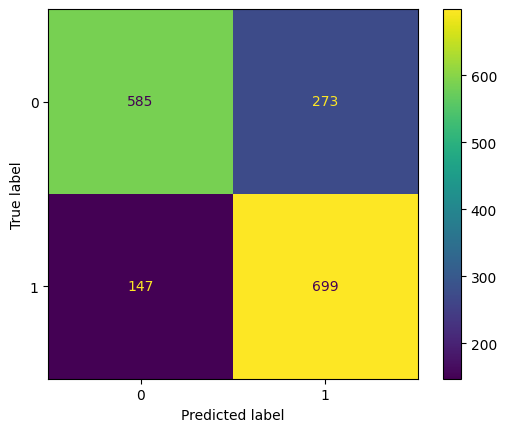

In [ ]:
confusion_matrix_train = confusion_matrix(y_train,y_predict_train)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
y_predict_test = lr.predict(X_test)

In [ ]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       278
           1       0.76      0.84      0.80       290

    accuracy                           0.78       568
   macro avg       0.78      0.78      0.78       568
weighted avg       0.78      0.78      0.78       568



In [ ]:
print(accuracy_score(y_test,y_predict_test))

0.7799295774647887


In [ ]:
print(confusion_matrix(y_test,y_predict_test))

[[199  79]
 [ 46 244]]


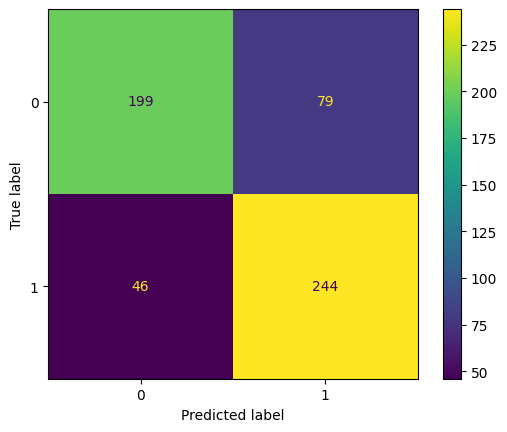

In [ ]:
confusion_matrix_test = confusion_matrix(y_test,y_predict_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
y_pred_prob = lr.predict_proba(X_test)[:,1]
fpr , tpr , threshold = roc_curve(y_test,y_pred_prob)

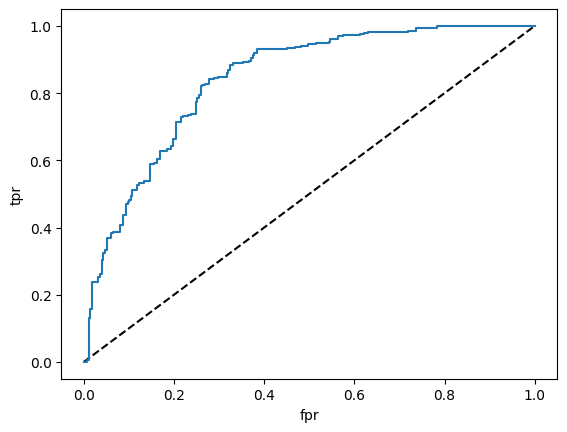

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_prob)

0.8401141156040685

In [ ]:
k_folds = KFold(n_splits=5)
cv_scores = cross_val_score(lr,X_train,y_train, cv = k_folds)

In [ ]:
summ = 0
for i in range(0,len(cv_scores)):
  summ += cv_scores[i]
print(f"mean accuracy is {round(summ / len(cv_scores),3)}")

mean accuracy is 0.752
